# 1. 딥러닝
401p

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation = 'softmax')
    ])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
#에포트 횟수가 반복될수록 비용함수는 줄어들고 정확도는 향상되고 있습니다
hist = model.fit(x_train, y_train, epochs=5)
#최종 인식 정확도는 98.1%
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('test_acc', test_acc)
model.summary()

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2981 - accuracy: 0.9140
Epoch 2/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1458 - accuracy: 0.9563
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.1080 - accuracy: 0.9665
Epoch 4/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0904 - accuracy: 0.9717
Epoch 5/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0755 - accuracy: 0.9766
10000/10000 - 0s - loss: 0.0785 - accuracy: 0.9761
test_acc 0.9761
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
____________________________

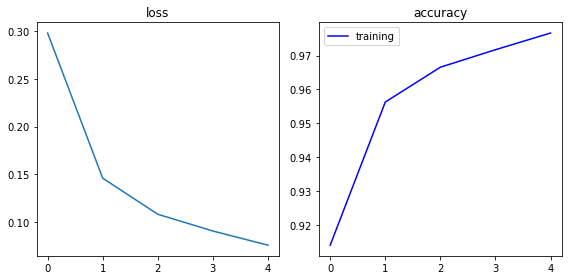

In [9]:
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.subplot(1,2,2)

plt.title("accuracy")
plt.plot(hist.history['accuracy'],'b-', label = 'training')
#plt.plot(model.history['val_accuracy'],'r:', label='validation')
plt.legend()
plt.tight_layout()
plt.show()

# 2. 딥러닝의 발전
410p

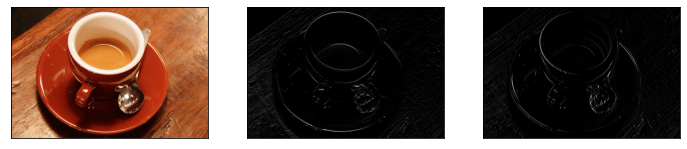

In [2]:
import numpy as np
import matplotlib.pylab as plt
from skimage.data import coffee
from skimage.filters import sobel_h, sobel_v
from skimage.color import rgb2gray

#커피 이미지를 input
image = coffee()
grey_image = rgb2gray(image)

#CONV
edge_h = sobel_h(grey_image)
edge_v = sobel_v(grey_image)

#ReLU
edge_h = np.where(edge_h<0,0, edge_h)
edge_v = np.where(edge_v<0,0,edge_v)
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,2)
plt.imshow(edge_h, cmap=plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.subplot(1,3,3)
plt.imshow(edge_v, cmap = plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.show()

# 3. 덴서플로 CNN 모델 만들기
412p

In [12]:
from tensorflow.keras import datasets, layers, models
(train_images, train_labels),(test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

#픽셀 값을 0~1사이로 정규화
train_images, test_images = train_images/255.0, test_images/255.0
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# 에포트 횟수가 반복될수록 손실함수는 줄어들고 정확도는 향상되고 있다
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 37s 616us/sample - loss: 0.1421 - accuracy: 0.9560
Epoch 2/5
60000/60000 [==============================] - 39s 654us/sample - loss: 0.0447 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 43s 724us/sample - loss: 0.0323 - accuracy: 0.9900
Epoch 4/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.0259 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 44s 734us/sample - loss: 0.0195 - accuracy: 0.9937


In [16]:
#최종 인식 정확도는 99.1% 로 나타남
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('test_acc: ', test_acc)

10000/10000 - 2s - loss: 0.0309 - accuracy: 0.9904
test_acc:  0.9904


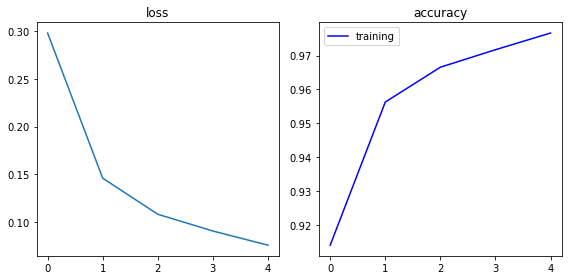

In [17]:
#시각화 평가
import matplotlib as mpl
import matplotlib.pylab as plt

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.title('loss')
plt.subplot(1,2,2)

plt.title('accuracy')
plt.plot(hist.history['accuracy'],'b-', label ='training')
#plt.plot(model.histpry['val_accuracy'],'r:',label='validation')
plt.legend()
plt.tight_layout()
plt.show()

# 4. 텐서플로 Estimator
417p

In [38]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pandas as pd

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth','Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginlca']
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names = CSV_COLUMN_NAMES, header =0)

In [39]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [41]:
def input_evaluation_set():
    features = {'SepalLength': np.array([6.4, 5.0]),
               'SepalWidth': np.array([2.8, 2.3]),
               'PetalLength': np.array([5.6, 3.3]),
               'PetalWidth': np.array([2.2,1.0])}
    labels = np.array([2,1])
    return features, labels
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

my_feature_columns=[]
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))

#30, 10 유닛으로 구성된 2개 계층 DNN 생성
classifier = tf.estimator.DNNClassifier(feature_columns = my_feature_columns, hidden_units=[30,10], n_classes =3)
classifier.train(input_fn=lambda: input_fn(train, train_y, training=True), steps=5000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\duswn\\AppData\\Local\\Temp\\tmpwatmmaut', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, y

In [27]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\n Test set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-04-20T13:25:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\duswn\AppData\Local\Temp\tmpt7u_klov\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.62233s
INFO:tensorflow:Finished evaluation at 2020-04-20-13:25:37
INFO:tensorflow:Saving dict for global step 5000: 

In [42]:
#X값 입력으로 모델 예측
expected = ["Setosa", 'Versicolor', 'Virginica']
predict_x={
    'SepalLength':[5.1, 5.9, 6.9],
    'SepalWidth':[3.3, 3.0, 3.1],
    'PetalLength':[1.7, 4.2, 5.4],
    'PetalWidth':[0.5, 1.5, 2.1]
}

def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)
predictions = classifier.predict(input_fn = lambda: input_fn(predict_x))

for pred_dict, expec in zip(predictions, expected):
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    
    print('Predictions is "{}" ({:.1f}%), expectied "{}"'.format(SPECIES[class_id], 100*probability, expec))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\duswn\AppData\Local\Temp\tmpwatmmaut\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions is "Setosa" (66.1%), expectied "Setosa"
Predictions is "Virginlca" (42.8%), expectied "Versicolor"
Predictions is "Virginlca" (62.0%), expectied "Virginica"
